#### Nome:
Igor de Andrade Assunção de Almeida.
#### DRE:
121095736

### Lista laboratório:
as questões da lista do laboratório foram feitas em conjunto com o aluno João Pedro Batista

# Questão 1

Para resolver a questão 1 nos pensamos em primeiro descobrir qual equação nos daria melhor aproximação para o valor desejado, usando a formula de resfriamento de newton que segue a seguir: $$T=(T_0-T_f)*e^{-kt}+T_f$$ Onde 

$T_0 - \text{Temperatura inicial do objeto}$

$T_f - \text{Temperatura final do objeto, ao atingir o equilíbrio}$

$k - \text{É uma constante determinada}$

$t - \text{O tempo passado}$

$T - \text{Temperatura no instante t}$

Pelo enunciado temos que $T_0=34º \text{ e } T_f=20º$, T é determinado pelo tempo t, e k teremos que descobrir, assim temos provisoriamente:
$$
T=(34-20)e^{-kt}+20 \therefore T=14e^{-kt}+20 
$$
Usando o enunciado temos 3 tempos distintos que nos dará 3 temperaturas distintas, que são esses pontos que seguiram a ordem $P_i=(t,T)$, assim teremos $P_0=(0,34),P_1=(90,30),P_2=(150,25)$,Criando os valores desses vetores abaixo e colocamos eles num gráfico teremos
$\{\}$

In [25]:
tempos = [0;90;150]

3-element Vector{Int64}:
   0
  90
 150

In [26]:
temperaturas = [34,30,25]

3-element Vector{Int64}:
 34
 30
 25

In [27]:
using LinearAlgebra
using Plots


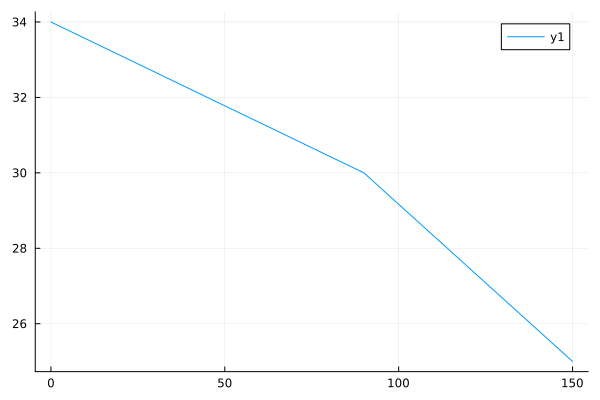

In [28]:
plot(tempos,temperaturas)

Trouxemos as ferramentas que irá nos ajudar a resolver o problema de aproximação para assim pode descobrir a hora que o cadáver morreu, para isso iremos descobrir com quais equações estamos trabalho para encontrar o valor de k necessário, assim substituiremos os pontos descritos acima na formula obtendo as seguintes equações:
$$
34=14e^{-k*0}+20 \to 34=14+20
$$
Esta equação em si não nos disse muita coisa então partiremos para as próximas
$$
30=14e^{-k*90}+20 \to 10/14=e^{-90k} \to \ln{\bigg(\cfrac{10}{14}\bigg)}=-90k
$$

Usando a mesma lógica para a outra teremos:
$$
25=14e^{-k*150}+20 \to 5/14=e^{-150k} \to \ln{\bigg(\cfrac{5}{14}\bigg)}=-150k
$$

Assim temos 2 valores possíveis para k, vamos encontrar aquele que melhor ser aproxima do valor que esperamos, assim teremos o seguinte sistema

$$
\begin{alignat}{2}
   -90k=\ln{\bigg(\cfrac{10}{14}\bigg)}\\
   -150k=\ln{\bigg(\cfrac{5}{14}\bigg)}
\end{alignat}

OU
\begin{bmatrix}
-90\\
-150
\end{bmatrix}
\cdot
\begin{bmatrix}
k\\
\end{bmatrix}

=
\begin{bmatrix}
\ln{\bigg(\cfrac{10}{14}\bigg)}\\
\ln{\bigg(\cfrac{5}{14}\bigg)}
\end{bmatrix}
$$
Ao transformar em códigos para poder executar as operações teremos abaixo os seguintes resultados.

Por fim, executamos mínimos quadrados por meio do $\backslash$ e descobrimos o k que melhor aproxima o nosso problema. 

In [29]:
tempos =[-90;-150]
results = [log(10/14);log(5/14)]
k = tempos\results

0.006036778231146499

Ao fazer a solução do sistema encontramos o valor de k logo abaixo:

In [30]:
println(k)

0.006036778231146499


O valor do erro da aproximação pode ser calculado conforme a célula abaixo:

In [31]:
norm((tempos * k) - results)

0.24121225724410217

Aqui criamos uma função que aplica a formula de newton para o k que achamos, e fizemos uns teste abaixo e podemos ver que ela aproxima relativamente bem para aquele k:

In [32]:
function resultadoTempoTemperatura(tempo,k)
    return 14*exp(-(tempos\results) * tempo) + 20
end

resultadoTempoTemperatura (generic function with 1 method)

In [33]:
println(resultadoTempoTemperatura(0,k))
println(resultadoTempoTemperatura(90,k))
print(resultadoTempoTemperatura(150,k))

34.0
28.131515290696022
25.660660575986327

Por fim fizemos o calculo da função que recebe a temperatura desejada e retorna o tempo passado para atingir a mesma

In [34]:
function resultadoTemperaturaTempo(temperatura,k)
    return (log(14/(temperatura-20))/k)
end


resultadoTemperaturaTempo (generic function with 1 method)

In [35]:
resultadoTemperaturaTempo(37,k)

-32.16219099108492

Aqui nos podemos ver que obtivemos o valor de aproximadamente -32 minutos, o que teoricamente não faz muito sentido, contudo tendo em vista que utilizamos a temperatura do tempo de encontro do corpo como $T_0$, e não a temperatura inicial de fato, o tempo utilizado também não era o inicial de fato, por isso nos devemos considerar o tempo inicial como aquele de quando a temperatura era de 34º, que no caso são 15:00, subtrando os aproximados 32 minutos teriamos, 14:28 seria o tempo de morte da vítima.

# Questão 2


In [36]:
function vandermonde(x,y,grau)
    n,=size(y)
    V=zeros(n,grau+1)
    for i=1:n #linhas
        for j=1:(grau+1)
            V[i,j]=x[i]^(j-1)
        end
    end
    return V
end

vandermonde (generic function with 1 method)

In [37]:
function regressão(x,y,grau)
    V=vandermonde(x,y,grau)
    c=V\y #mínimos quadrados
    return c
end

regressão (generic function with 1 method)

In [38]:
function polinomio(c,xs)
    s = 0
    tam = size(c,1)
    for i=1:tam
        s = s + (c[i] * xs^(i-1))
    end
    return s
end

polinomio (generic function with 1 method)

Como o enunciado da questão pede geramos 30 valores aleatórios de x, e logo após 30 valores aleatórios de y, e então aplicamos a função regressão para diferentes tipos de graus indo de 0 a 29, assim obtemos os valores das constantes que estão ligados aqueles x e y.

Logo após isso nos fazemos o calculo usando os x's os c obtidos e comparamos com o valor desejado, que no caso são os y's, e vemos o quão distante estão e atribuimos isso a um vetor erro. E então podemos observar que conforme aumentamos o grau o erro diminui até o 29 no qual o erro acaba desviando bastante do padrão que seguia.

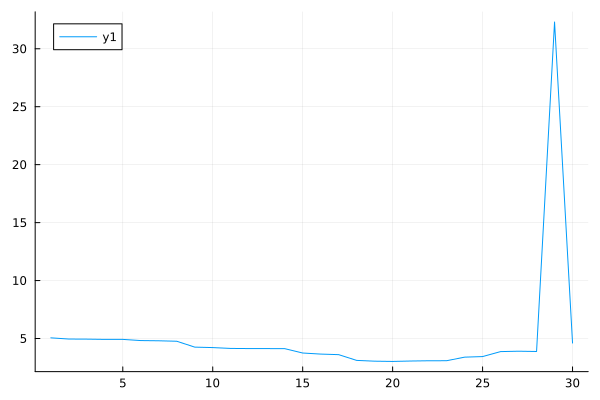

In [127]:
A = zeros(30,5)
xs = randn(30)
ys = randn(30)
ys1 = []
is = []
erro = zeros(30,1)

cs = []
result = []

for i=1:30
    c = regressão(xs,ys,i)
    push!(cs, c)
    push!(is, i)
end

for i=1:30
    for j=1:30
        erro[i] = erro[i] + (ys[j] - polinomio(cs[i],xs[j]))^2
    end
    erro[i] = sqrt(erro[i])
end
scatter(is, erro, c=:lightblue, ms=3, leg=false)
plot(is,erro)


# Questão 3

Essa questão será feita pensando na proporção entre as vitórias relatadas, da seguinte forma:
Quando nos é dito que Toy Story ganhou de 12 a 1 de Rocky, iremos modelar que o número de pessoas que preferem Toy Story é 12 vezes maior que o de Rocky, assim ficamos:
$$
    x_1 = 12x_2\; \therefore\; x_1- 12x_2 = 0
$$
Faremos isso para todos os resultados relatados, ao final disso adicionaremos uma condição de "amarra" no númeoro alunos na turma, falando que a soma deles obrigatoriamente precisa dar 13 para que o resultado final faça sentido.

In [130]:
filmes = ["Toy Story", "Rocky", "De volta pro futuro", 
"Curtindo a vida adoidado", "Os Incriveis", "Duna", "Batman begins", "Harry Potter", "Shrek"]

matriz_filmes = zeros(15,9)
matriz_filmes[1,1] = 1
matriz_filmes[1,2] = -12
matriz_filmes[2,3] = 5
matriz_filmes[2,4] = -8
matriz_filmes[3,5] = 3
matriz_filmes[3,6] = -10
matriz_filmes[4,7] = 5
matriz_filmes[4,8] = -7
matriz_filmes[5,9] = 2
matriz_filmes[5,6] = -11
matriz_filmes[6,8] = 3
matriz_filmes[6,2] = -10
matriz_filmes[7,1] = 4
matriz_filmes[7,3] = -9
matriz_filmes[8,5] = 4
matriz_filmes[8,8] = -9
matriz_filmes[9,4] = 5
matriz_filmes[9,6] = -7
matriz_filmes[10,3] = 5
matriz_filmes[10,6] = -7
matriz_filmes[11,9] = 1
matriz_filmes[11,2] = -12
matriz_filmes[12,5] = 4
matriz_filmes[12,7] = -9
matriz_filmes[13,1] = 5
matriz_filmes[13,7] = -8
matriz_filmes[14,5] = 3
matriz_filmes[14,4] = -10
b = zeros(15,1)
b[15] = 13
for i=1:9
    matriz_filmes[15,i] = 1
end

println("O filme preferido da turma é: ", filmes[argmax(matriz_filmes\b)] )





O filme preferido da turma é: Shrek


Após os calculos feitos, chegamos a conclusão que o filme favorito da turma seria Shrek.

# Questão 4

Nesta questão nos fizemos 2 vetores, um com as pesagens e outros com os dias passados desde o primeiro dia, $t_0=0$, que nesse caso era o dia 26/10.

Logo após montar esses vetores nos notamos que tinhamos uma fução na qual nos davamos algum dia, e ele devolvia a pesagem daquele dia de forma aproximada.

Assim teremos as seguintes igualdades:

$$

\begin{alignat}{2}
   t_0\alpha+\beta=120.6\\
   t_1\alpha+\beta=121.6\\
   t_2\alpha+\beta=120.8\\
   \vdots\\
   t_{83}\alpha+\beta=115.3
\end{alignat}
$$
OU
$$
\begin{bmatrix}
   t_0 & 1 \\
   t_1 & 1 \\
   t_2 & 1 \\
   \vdots  \\
   t_{83} & 1
\end{bmatrix}
\cdot
\begin{bmatrix}
   \alpha \\ \beta
\end{bmatrix}
=
\begin{bmatrix}
   120.6 \\
   121.6 \\
   120.8 \\
   \vdots \\
   115.3
\end{bmatrix}
$$

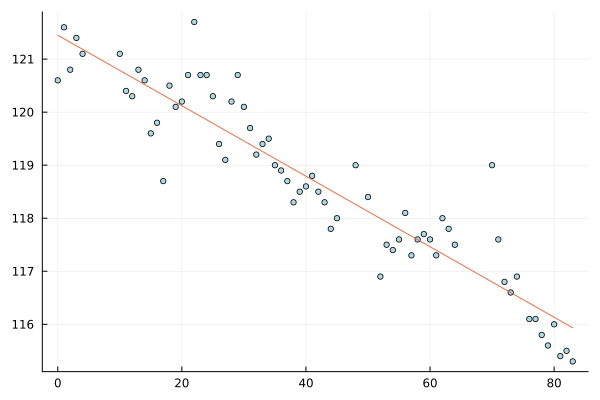

In [41]:
pesagem = [ 120.6, 121.6, 120.8, 121.4, 121.1, 121.1, 120.4, 120.3, 120.8, 120.6, 119.6, 119.8, 118.7, 120.5, 120.1, 120.2, 120.7, 121.7, 120.7, 120.7, 120.3, 119.4, 119.1, 120.2, 120.7, 120.1, 119.7, 119.2, 119.4, 119.5, 119, 118.9, 118.7, 118.3, 118.5, 118.6, 118.8, 118.5, 118.3, 117.8, 118, 119, 118.4, 116.9, 117.5, 117.4, 117.6, 118.1, 117.3, 117.6, 117.7, 117.6, 117.3, 118, 117.8, 117.5, 119, 117.6, 116.8, 116.6, 116.9, 116.1, 116.1, 115.8, 115.6, 116, 115.4, 115.5, 115.3]
dias = [0, 1, 2, 3, 4, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 48, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83]

#reta
V=vandermonde(dias,pesagem,1)
b=regressão(dias,pesagem,1)
reta(dias)=b[1]+b[2]*dias

dia = Int64(round((110-b[1])/b[2])) 
scatter(dias, pesagem, c=:lightblue, ms=3, leg=false)
plot!(reta)

In [42]:
using Dates
data_inicial = Date("2023-10-26",dateformat"y-m-d" )
df = DateFormat("dd-mm-yyyy")
println("O dia em que ele deve chegar aos 110Kg vai ser depois de ", dia, " que em datas é ", (data_inicial+Dates.Day(dia)))

O dia em que ele deve chegar aos 110Kg vai ser depois de 172 que em datas é 2024-04-15


### Questão 38 Lista de exercícios:

Monarquia m 
Republica r


$$
r_{k+1} = 0.7r_{k} +  0.2m_{k}\\
m_{k+1} = 0.3r_{k} + 0.8m_{k}\\
\therefore \\
\begin{bmatrix}
        0.7&0.2\\
        0.3&0.8
\end{bmatrix} . 
\begin{bmatrix}
        r_{k}\\
        m_{k}
\end{bmatrix} = \begin{bmatrix}
        r_{k+1}\\
        m_{k+1}
\end{bmatrix}

$$


In [43]:
populacao_Inicial = [1000,1000] #o primeiro valor são os republicanos, e o segundo os monarquistas.
# Como metade da população apoia a republica, basta colocar o mesmo valor nas posições da matriz para fazer sentido com o enunciado

matriz = [0.7 0.2
            0.3 0.8] 
k = 100 #sendo k o numero de anos, populacao_Final é o resultado do sistema depois de k anos.
populacao_Final = matriz^k*populacao_Inicial
println("A porcentagem de pessoas que apoia os republicanos é " ,round((populacao_Final[1]/sum(populacao_Final)*100); digits = 3)
,"% e a porcentagem que apoia os monarquistas é: ",round((populacao_Final[2]/sum(populacao_Final)*100); digits = 3),"%")

A porcentagem de pessoas que apoia os republicanos é 40.0% e a porcentagem que apoia os monarquistas é: 60.0%


#### a) O código que calcula $r_k$ e $m_k$ é 
populacao_Final = matriz^k*populacao_Inicial

#### b) Em 10 anos o pocentual de apoio será: 
40% para os republicanos e 60% para os monarquistas. 

#### c) A longo prazo o percentual será:
O mesmo da letra b.

# Questão 39 da lista de exercícios:

#### a) Modelando o sistema populacional:

$$
p_n= Populacao\; nova\\
p_m = Populacao\; madura\\
p_v = Populacao\; velha\\
$$ 
Vetor Populacional inicial:
$$
\begin{bmatrix}
        p_n\\
        p_m\\
        p_v
\end{bmatrix}
$$
Equações que modelam a passagem de tempo em mes:
$$
p_{n_{k+1}}= 0.5*p_{m_{k}} + 0.2p_{v_{k}}\\
p_{m_{k+1}} = 0.8*p_{n_{k}}\\
p_{v_{k+1}} = 0.5p_{m_{k}}\\
$$ 
Passando para matriz:
$$
\begin{bmatrix}
        0&0.5&0.2\\
        0.8&0&0\\
        0&0.5&0
\end{bmatrix}.\begin{bmatrix}
        p_n\\
        p_m\\
        p_v
\end{bmatrix}=\begin{bmatrix}
        p_{n_{k+1}}\\
        p_{m_{k+1}}\\
        p_{v_{k+1}}
\end{bmatrix} 
$$

#### a) Modelagem:
$$
\begin{bmatrix}
        0&0.5&0.2\\
        0.8&0&0\\
        0&0.5&0
\end{bmatrix}.\begin{bmatrix}
        p_n\\
        p_m\\
        p_v
\end{bmatrix}=\begin{bmatrix}
        p_{n_{k+1}}\\
        p_{m_{k+1}}\\
        p_{v_{k+1}}
\end{bmatrix} 
$$

#### b)
Aqui, nos foi dada a matriz populacioanl inicial, ela é:
$$
\begin{bmatrix}
        250\\
        0\\
        0
\end{bmatrix}
$$
Vamos calcular a população nos 5 primeiros meses

In [44]:
população_inicial = [250;0;0]
matriz_populacional = [0 0.5 0.2
                       0.8 0 0 
                       0  0.5 0 ]
populacao_mensal = []
for i=1:5
    push!(populacao_mensal,matriz_populacional^i * população_inicial)
    println("A população nova é: ", populacao_mensal[i][1], " a população madura é: ",(populacao_mensal[i][2]),
    " a população velha é: ", (populacao_mensal[i][3]))
end


A população nova é: 0.0 a população madura é: 200.0 a população velha é: 0.0
A população nova é: 100.0 a população madura é: 0.0 a população velha é: 100.0
A população nova é: 20.000000000000004 a população madura é: 80.00000000000001 a população velha é: 0.0
A população nova é: 40.00000000000001 a população madura é: 16.000000000000004 a população velha é: 40.00000000000001
A população nova é: 16.000000000000004 a população madura é: 32.00000000000001 a população velha é: 8.000000000000002


#### c)
Para calcularmos essa proporção precisaremos calcular os autovalores da matriz populacional:
$$
DET(\begin{bmatrix}
        0-\lambda&0.5&0.2\\
        0.8&0-\lambda&0\\
        0&0.5&0-\lambda
\end{bmatrix}) = \begin{bmatrix}
        -\lambda&0.5&0.2&-\lambda&0.5\\
        0.8&-\lambda&0&0.8&-\lambda\\
        0&0.5&-\lambda&0&0.5
\end{bmatrix} = -\lambda^3+0.08 +0.4\lambda
$$
Na falta de uma forma mais apropriada para resolver a equação, usaremos o júlia para calcular:

In [45]:
eigen(matriz_populacional).values

3-element Vector{Float64}:
 -0.4847244279981398
 -0.2306934610291525
  0.7154178890272924

Com base nesses valores, conseguimos ver que a matriz populacional tende à zero, visto que todos os seus autovalores em módulos são menores que um. Entretando, isso não quer dizer que é impossível calcular a proporsão que ela vai gerar. Ordenando os autovalores do maior para o menor e montando a equação do vetor final, podemos escrever:
$$
V = c_1*(\lambda_1)^k*w_1 +c_2*(\lambda_2)^k*w_2+ c_3*(\lambda_3)^k*w_3  
$$
Agora, para acharmos a proporção queremos achar o que ocorre nessa equação quando k tende ao infinito. Mas, repare que como todo $\lambda$ é menor que 1 em módulo, todos vão para zero. Um truque que podemos fazer é dividir toda a equação por $\lambda^k$:

$$
lim_{k\rightarrow{}\inf} = c_1*w_1 +\frac{c_2*(\lambda_2)^k*w_2}{\lambda_1^k}+ \frac{c_3*(\lambda_3)^k*w_3}{\lambda_1^k} = c_1*w_1
$$
Como $c_1$ é um componente inicial qualquer, quem irá mandar na proporsão é $w_1$ que é o autovetor associado ao maior autovalor.

In [46]:
eigen(matriz_populacional)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
3-element Vector{Float64}:
 -0.4847244279981398
 -0.2306934610291525
  0.7154178890272924
vectors:
3×3 Matrix{Float64}:
 -0.388597   0.119938  0.591188
  0.64135   -0.415921  0.661082
 -0.661561   0.901457  0.462025

Aqui, podemos ver que o autovetor é: 
$$
\begin{bmatrix}
        0.591188\\
        0.661082\\
        0.462025
\end{bmatrix}
$$
Que quando calculada nos dá uma proporsão de:
$$
\begin{bmatrix}
        0.344857799\\
    0.385629078\\
    0.269513123
\end{bmatrix}
$$

#### d)
O método escolhido foi o de autovetores e autovalores, ele foi explicado enquato se era calculado.

#### Questão em sala 1)
Dado 5 pontos, determine a interpolação por partes usando duas cúbicas de maneira que a interpolação seja suave (a derivada e a segunda derivada são contínuas).

Pelo enunciado, precisamos usar duas equações cúbicas para aproximas essa curva. Começaremos montando elas:
$$
Eq1 = c_1 + c_2x + c_3x^2 + c_4x^3\\
Eq2 = d_1 + d_2x + d_3x^2 + d_4x^3\\
$$
Após isso, teremos 5 pontos aleatórios e queremos interpolar essas cúbidas nelas, vamos assumir(inicialmente) que os pontos foram:
$$
(x_1,y_1),(x_2,y_2),(x_3,y_3),(x_4,y_4),(x_5,y_5)
$$
Como temos 5 pontos e duas equações cúbicas, faremos com que no terceiro ponto as duas equações passem sobre ele, isso irá nos gerar uma "continuidade" pela aproximação das duas equações, embora apenas isso não nos garanta que ela seja suave:
$$
y_1 = c_1 + c_2x_1 + c_3x_1^2 + c_4x_1^3\\
y_2 = c_1 + c_2x_2 + c_3x_2^2 + c_4x_2^3\\
y_3 = c_1 + c_2x_3 + c_3x_3^2 + c_4x_3^3\\
y_3 = d_1 + d_2x_3 + d_3x_3^2 + d_4x_3^3\\
y_4 = d_1 + d_2x_4 + d_3x_4^2 + d_4x_4^3\\
y_5 = d_1 + d_2x_5 + d_3x_5^2 + d_4x_5^3\\
$$
Como falado, esse sistema por sí só já nos daria uma interpolação, mas uma bem "grosseira" no ponto $(x_3,y_3)$. Para melhorarmos ela, precisaremos igualar as duas derivadas nesse ponto.

$$
f'_1= c_2 + 2c_3x_3 + 3c_4x_3^2\\
f'_2 = d_2 + 2d_3x_3 + 3d_4x_3^2\\
c_2 + 2c_3x_3 + 3c_4x_3^2 = d_2 + 2d_3x_3 + 3d_4x_3^2\\
c_2 + 2c_3x_3 + 3c_4x_3^2-d_2 - 2d_3x_3 - 3d_4x_3^2 = 0\\
$$
Fazendo o mesmo para a segunda derivada, chegamos na igualdade:
$$
 2c_3 + 6c_4x_3 - 2d_3 - 6d_4x_3 = 0\\
$$
Agora, podemos adicionar essas duas equações ao nosso sistema:
$$
y_1 = c_1 + c_2x_1 + c_3x_1^2 + c_4x_1^3\\
y_2 = c_1 + c_2x_2 + c_3x_2^2 + c_4x_2^3\\
y_3 = c_1 + c_2x_3 + c_3x_3^2 + c_4x_3^3\\
y_3 = d_1 + d_2x_3 + d_3x_3^2 + d_4x_3^3\\
y_4 = d_1 + d_2x_4 + d_3x_4^2 + d_4x_4^3\\
y_5 = d_1 + d_2x_5 + d_3x_5^2 + d_4x_5^3\\
0=c_2 + 2c_3x_3 + 3c_4x_3^2-d_2 - 2d_3x_3 - 3d_4x_3^2\\
0=2c_3 + 6c_4x_3 - 2d_3 - 6d_4x_3\\
$$

Por fim, colocaremos em modo matricial para fazer os cálculos: 
$$
\begin{bmatrix}
        1&x_1&x^2_1&x^3_1&0&0&0&0\\
        1&x_2&x^2_2&x^3_2&0&0&0&0\\
        1&x_3&x^2_3&x^3_3&0&0&0&0\\
        0&0&0&0&1&x_3&x^2_3&x^3_3\\
        0&0&0&0&1&x_4&x^2_4&x^3_4\\
        0&0&0&0&1&x_5&x^2_5&x^3_5\\
        0&1&2x_3&3x_3^2&0&-1&-2x_3&-3x_3^2\\
        0&0&2&6x_3&0&0&-2&-6x_3
\end{bmatrix}.\begin{bmatrix}
        c_1\\
        c_2\\
        c_3\\
        c_4\\
        d_1\\
        d_2\\
        d_3\\
        d_4
\end{bmatrix} = \begin{bmatrix}
        y_1\\
        y_2\\
        y_3\\
        y_3\\
        y_4\\
        y_5\\
        0\\
        0
\end{bmatrix}
$$

Agora, calcularemos e plotaremos em julia:

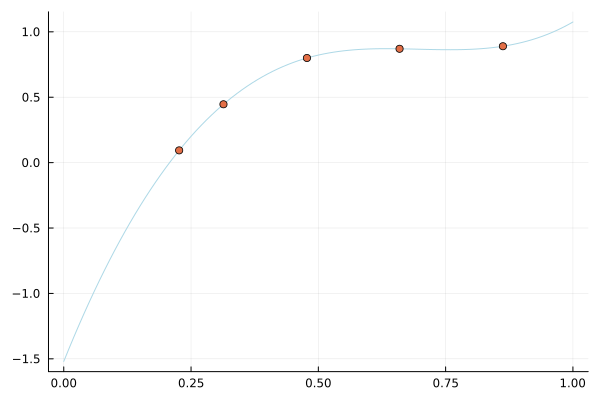

In [118]:
xs = sort(rand(5))
ys = sort(rand(5))
matriz_calculo = zeros(8,8)
for i=1:3
    for j=1:4
        matriz_calculo[i,j] = xs[i]^(j-1)
    end
end
for i=4:6
    for j=5:8
        matriz_calculo[i,j] = xs[i-1]^((j-4)-1)
    end
end
matriz_calculo[7,2] = 1
matriz_calculo[7,3] = 2*xs[3]
matriz_calculo[7,4] = 3*xs[3]^2
matriz_calculo[7,6] = -1
matriz_calculo[7,7] = -2*xs[3]
matriz_calculo[7,8] = -3*xs[3]^2

matriz_calculo[8,3] = 2
matriz_calculo[8,4] = 6*xs[3]
matriz_calculo[8,7] = -2
matriz_calculo[8,8] = -6*xs[3]

b = [ys[1];ys[2];ys[3];ys[3];ys[4];ys[5];0;0]
coeficientes = matriz_calculo \ b
cs = coeficientes[1:4]
ds = coeficientes[5:8]
x_plot = [i for i in 0:0.01:1]
y_plot = zeros(size(x_plot,1),1)
for i=1:size(x_plot,1)
    if(x_plot[i]> xs[3])
        y_plot[i] = polinomio(ds,x_plot[i])
    else
        y_plot[i] = polinomio(cs,x_plot[i])
    end
end
plot(x_plot, y_plot, c=:lightblue, ms=3, leg=false)
scatter!(xs, ys)


#### Questão 2 em sala)
Dado 5 pontos, determine a interpolação por partes usando duas cúbicas de maneira que a interpolação seja suave (a derivada seja contínua) e que a inclinação da reta tangente no ponto inicial seja 0.

Fazendo os mesmos passos da questão anterior, chegamos nas equações:

$$
y_1 = c_1 + c_2x_1 + c_3x_1^2 + c_4x_1^3\\
y_2 = c_1 + c_2x_2 + c_3x_2^2 + c_4x_2^3\\
y_3 = c_1 + c_2x_3 + c_3x_3^2 + c_4x_3^3\\
y_3 = d_1 + d_2x_3 + d_3x_3^2 + d_4x_3^3\\
y_4 = d_1 + d_2x_4 + d_3x_4^2 + d_4x_4^3\\
y_5 = d_1 + d_2x_5 + d_3x_5^2 + d_4x_5^3\\
0=c_2 + 2c_3x_3 + 3c_4x_3^2-d_2 - 2d_3x_3 - 3d_4x_3^2\\

$$
Agora, nos falta adicionar a equação que irá fazer com que a inclinação no ponto inicial seja 0:

$$
0=c_2 + 2c_3x_1 + 3c_4x_1^2
$$
ficando com:
$$
y_1 = c_1 + c_2x_1 + c_3x_1^2 + c_4x_1^3\\
y_2 = c_1 + c_2x_2 + c_3x_2^2 + c_4x_2^3\\
y_3 = c_1 + c_2x_3 + c_3x_3^2 + c_4x_3^3\\
y_3 = d_1 + d_2x_3 + d_3x_3^2 + d_4x_3^3\\
y_4 = d_1 + d_2x_4 + d_3x_4^2 + d_4x_4^3\\
y_5 = d_1 + d_2x_5 + d_3x_5^2 + d_4x_5^3\\
0=c_2 + 2c_3x_3 + 3c_4x_3^2-d_2 - 2d_3x_3 - 3d_4x_3^2\\
0=c_2 + 2c_3x_1 + 3c_4x_1^2
$$
Que em matriz é:
$$
\begin{bmatrix}
        1&x_1&x^2_1&x^3_1&0&0&0&0\\
        1&x_2&x^2_2&x^3_2&0&0&0&0\\
        1&x_3&x^2_3&x^3_3&0&0&0&0\\
        0&0&0&0&1&x_3&x^2_3&x^3_3\\
        0&0&0&0&1&x_4&x^2_4&x^3_4\\
        0&0&0&0&1&x_5&x^2_5&x^3_5\\
        0&1&2x_3&3x_3^2&0&-1&-2x_3&-3x_3^2\\
        0&1&2x_1&3x_1^2&0&0&0&0
\end{bmatrix}.\begin{bmatrix}
        c_1\\
        c_2\\
        c_3\\
        c_4\\
        d_1\\
        d_2\\
        d_3\\
        d_4
\end{bmatrix} = \begin{bmatrix}
        y_1\\
        y_2\\
        y_3\\
        y_3\\
        y_4\\
        y_5\\
        0\\
        0
\end{bmatrix}

$$


Ficamos assim, com quase o mesmo código da questão anterior:

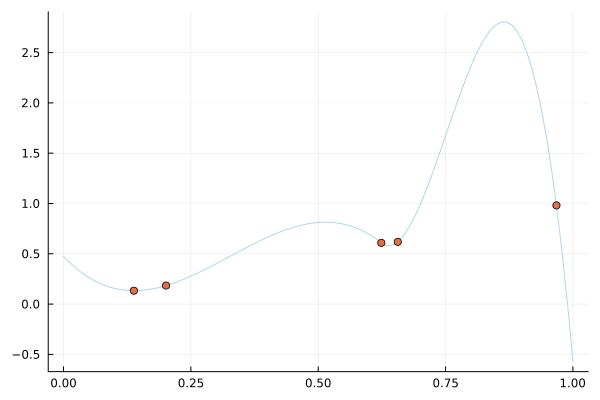

In [124]:
xs = sort(rand(5))
ys = sort(rand(5))
matriz_calculo = zeros(8,8)
for i=1:3
    for j=1:4
        matriz_calculo[i,j] = xs[i]^(j-1)
    end
end
for i=4:6
    for j=5:8
        matriz_calculo[i,j] = xs[i-1]^((j-4)-1)
    end
end
matriz_calculo[7,2] = 1
matriz_calculo[7,3] = 2*xs[3]
matriz_calculo[7,4] = 3*xs[3]^2
matriz_calculo[7,6] = -1
matriz_calculo[7,7] = -2*xs[3]
matriz_calculo[7,8] = -3*xs[3]^2

matriz_calculo[8,2] = 1
matriz_calculo[8,3] = 2xs[1]
matriz_calculo[8,4] = 3*xs[1]^2

b = [ys[1];ys[2];ys[3];ys[3];ys[4];ys[5];0;0]
coeficientes = matriz_calculo \ b
cs = coeficientes[1:4]
ds = coeficientes[5:8]
x_plot = [i for i in 0:0.01:1]
y_plot = zeros(size(x_plot,1),1)
for i=1:size(x_plot,1)
    if(x_plot[i]> xs[3])
        y_plot[i] = polinomio(ds,x_plot[i])
    else
        y_plot[i] = polinomio(cs,x_plot[i])
    end
end
plot(x_plot, y_plot, c=:lightblue, ms=3, leg=false)
scatter!(xs, ys)
